In [1]:
install.packages("igraph", repos = "https://cran.cnr.berkeley.edu/")
install.packages("pracma", repos = "https://cran.cnr.berkeley.edu/")
library('igraph')
library('Matrix')
library("pracma")

package 'igraph' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\mathu\AppData\Local\Temp\RtmpKe8kwR\downloaded_packages
package 'pracma' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\mathu\AppData\Local\Temp\RtmpKe8kwR\downloaded_packages


Warning message:
"package 'igraph' was built under R version 3.5.3"
Attaching package: 'igraph'

The following objects are masked from 'package:stats':

    decompose, spectrum

The following object is masked from 'package:base':

    union

Warning message:
"package 'Matrix' was built under R version 3.5.3"Warning message:
"package 'pracma' was built under R version 3.5.3"
Attaching package: 'pracma'

The following objects are masked from 'package:Matrix':

    expm, lu, tril, triu



## Part 2.1 - a

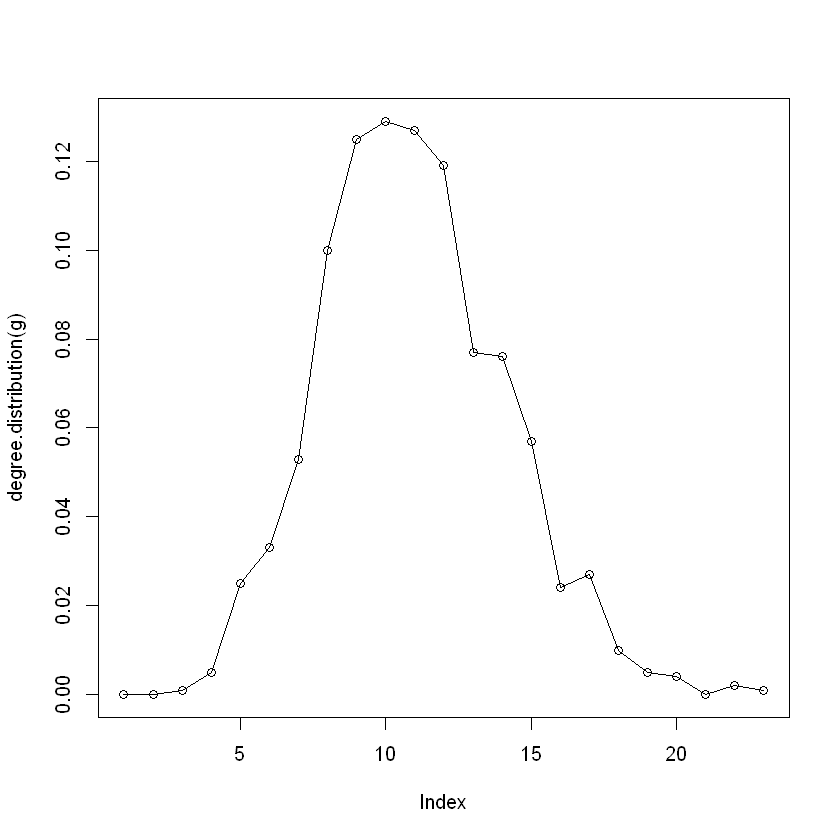

In [2]:
g <- erdos.renyi.game(1000, 0.01, directed=F);
plot(degree.distribution(g))
lines(degree.distribution(g))

## Part 2.1 - b

In [3]:
create_transition_matrix = function (g){
    
    # WARNING: make sure your graph is connected (you might input GCC of your graph)
    
    vs = V(g)
    n = vcount(g)
    adj = as_adjacency_matrix(g)
    adj[diag(rowSums(adj) == 0)] = 1  # handle if the user is using the function for networks with isolated nodes by creating self-edges
    z = matrix(rowSums(adj, , 1))
    
    transition_matrix = adj / repmat(z, 1, n)  # normalize to get probabilities
    
    return(transition_matrix)
}

In [4]:
random_walk = function (g, num_steps, start_node, transition_matrix = NULL){
    if(is.null(transition_matrix))
        transition_matrix = create_transition_matrix(g)
    
    dist = c()
    v = start_node
    for(i in 1:num_steps){
        #fprintf('Step %d: %d\n', i, v)  # COMMENT THIS
        PMF = transition_matrix[v, ]
        v = sample(1:vcount(g), 1, prob = PMF)
        dist[i] <- shortest.paths(g,start_node,v)
    }
    
    return(dist)
}

In [5]:
t<-1000

In [6]:
distance_total<-seq(0,0,length.out=t)
total_list <- list()
t_arr<-seq(1,t,1)

In [7]:
for (i in seq(1,100,1)) {
    v_start = sample(vcount(g), 1)
    distance = random_walk(g, t, v_start)
    total_list[[i]] <- distance 
    distance_total<-distance_total+distance   
}
distance_total<-distance_total/100

In [8]:
sd <- seq(0,0,length.out=t)
for(i in seq(1,100,1)) {
    sd<-sd+`^`(total_list[[i]]-distance_total,2)
}
sd<-sd/100

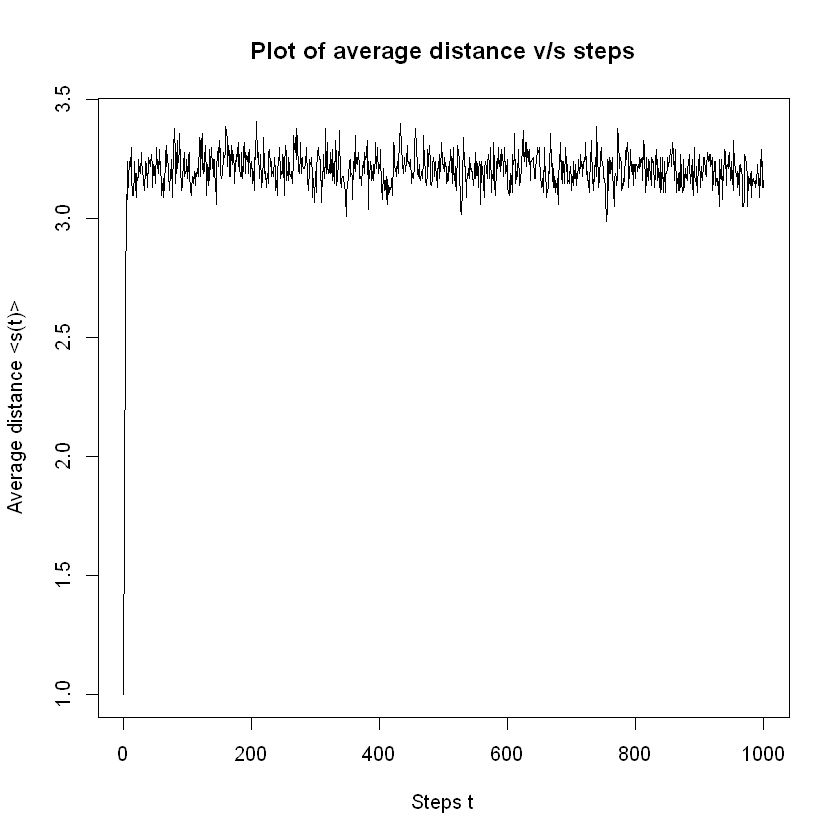

In [9]:
plot(t_arr,distance_total,type="l",main="Plot of average distance v/s steps", xlab="Steps t", ylab="Average distance <s(t)>")

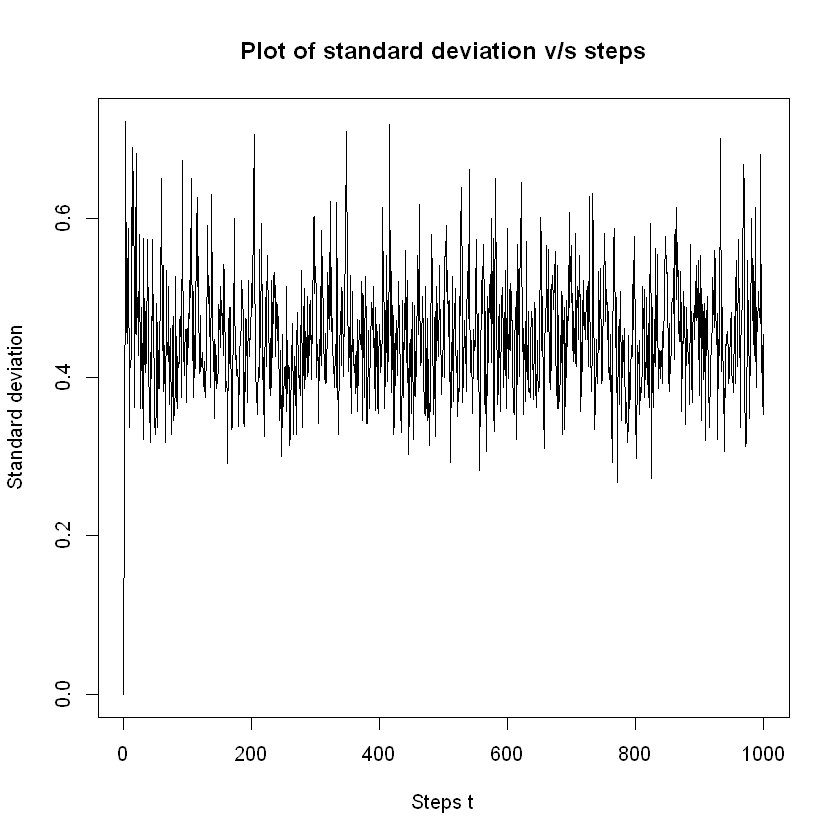

In [11]:
plot(t_arr,sd,type="l",main="Plot of standard deviation v/s steps", xlab="Steps t", ylab="Standard deviation")

## Part 2.1 - c

In [12]:
random_walk_deg = function (g, num_steps, start_node, transition_matrix = NULL){
    if(is.null(transition_matrix))
        transition_matrix = create_transition_matrix(g)
    
    dist = c()
    v = start_node
    for(i in 1:num_steps){
        #fprintf('Step %d: %d\n', i, v)  # COMMENT THIS
        PMF = transition_matrix[v, ]
        v = sample(1:vcount(g), 1, prob = PMF)
    }
    
    return(degree(g,v))
}

In [13]:
degree_list <- c()

In [14]:
for (i in seq(1,100,1)) {
    v_start = sample(vcount(g), 1)
    degree_list[i] = random_walk_deg(g, t, v_start)  
}
dg <- table(degree_list)/100

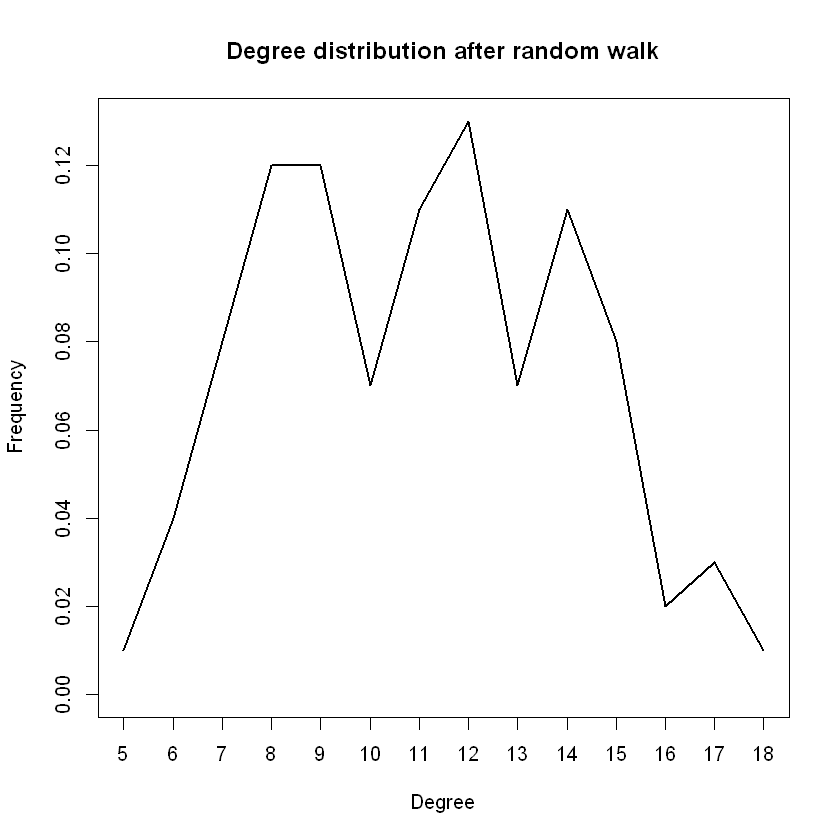

In [15]:
plot(dg,type="l",main="Degree distribution after random walk", xlab="Degree", ylab="Frequency")

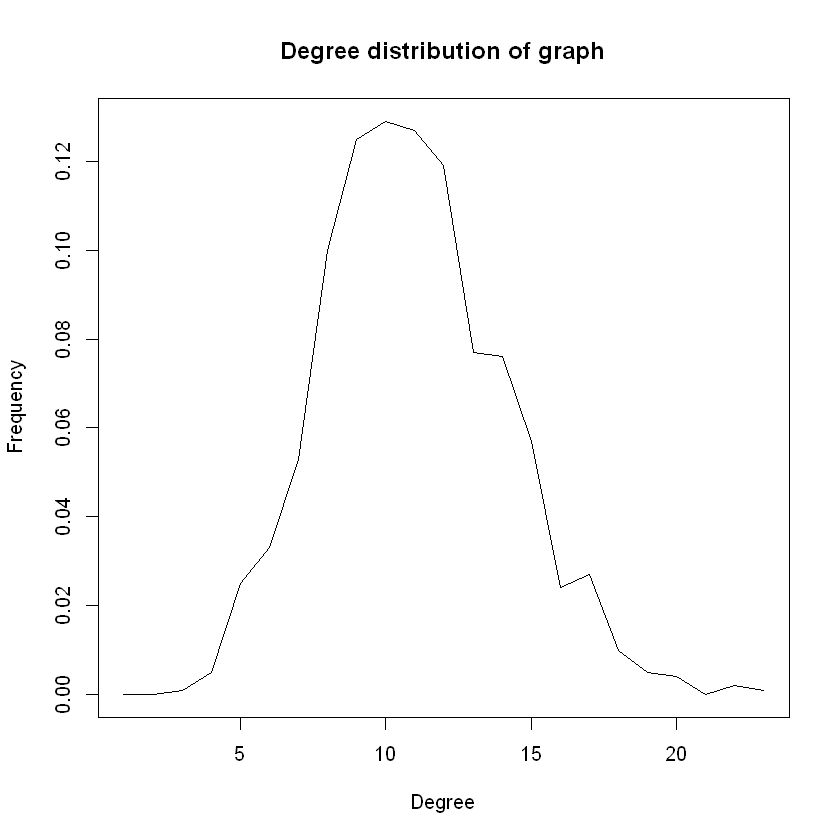

In [16]:
plot(degree.distribution(g),type="l",main="Degree distribution of graph", xlab="Degree", ylab="Frequency")

## Part 2.1 - d

In [18]:
set.seed(0)
g1 <- erdos.renyi.game(100, 0.01)
a = is.connected(g1)
if(a==FALSE) {
        sub_graph <-induced.subgraph(g1,c(1:10))
        g1.components <- clusters(g1)
        ix <- which.max(g1.components$csize)
        g1.giant <- induced.subgraph(g1, which(g1.components$membership == ix))
        gcc_size <- vcount(g1.giant)
        g1=g1.giant
    }

diameter(g1)

distance_total_1<-seq(0,0,length.out=t)
total_list_1 <- list()
t_arr_1<-seq(1,t,1)

for (i in seq(1,100,1)) {
    v_start = sample(vcount(g1), 1)
    distance = random_walk(g1, t, v_start)
    total_list_1[[i]] <- distance 
    distance_total_1<-distance_total_1+distance   
}
distance_total_1<-distance_total_1/100

sd_1 <- seq(0,0,length.out=t)
for(i in seq(1,100,1)) {
    sd_1<-sd_1+`^`(total_list_1[[i]]-distance_total_1,2)
}
sd_1<-sd_1/100

[1] 10

In [19]:
is.connected(g1)

[1] TRUE

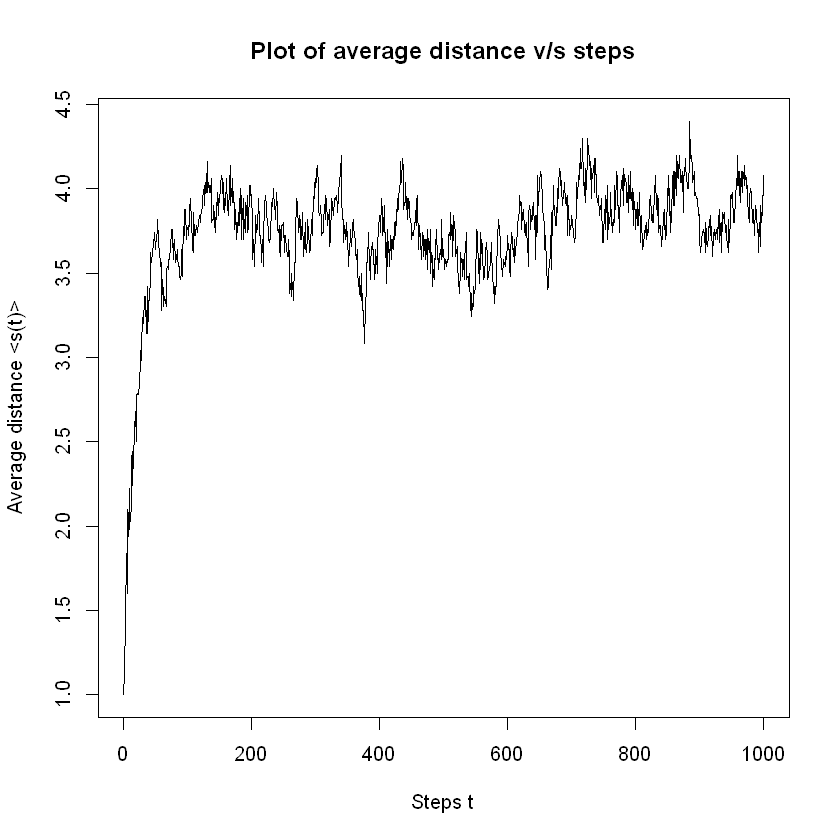

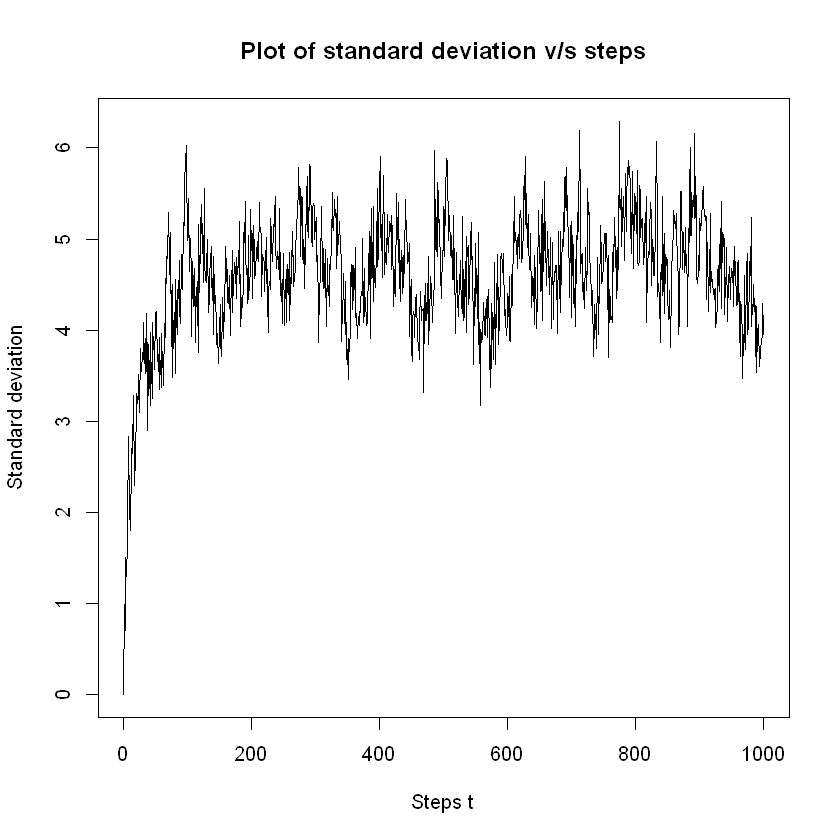

In [20]:
plot(t_arr_1,distance_total_1,type="l",main="Plot of average distance v/s steps", xlab="Steps t", ylab="Average distance <s(t)>")
plot(t_arr_1,sd_1,type="l",main="Plot of standard deviation v/s steps", xlab="Steps t", ylab="Standard deviation")

In [21]:
g2 <- erdos.renyi.game(10000, 0.01)
diameter(g2)
distance_total_2<-seq(0,0,length.out=t)
total_list_2 <- list()
t_arr_2<-seq(1,t,1)

for (i in seq(1,100,1)) {
    v_start = sample(vcount(g2), 1)
    distance = random_walk(g2, t, v_start)
    total_list_2[[i]] <- distance 
    distance_total_2<-distance_total_2+distance   
}
distance_total_2<-distance_total_2/100

sd_2 <- seq(0,0,length.out=t)
for(i in seq(1,100,1)) {
    sd_2<-sd_2+`^`(total_list_2[[i]]-distance_total_2,2)
}
sd_2<-sd_2/100

[1] 3

## Part 2.2 - a

In [22]:
g3 <- barabasi.game(1000, m=1, directed=FALSE)
t<-100

## Part 2.2 - b

In [23]:
distance_total_3<-seq(0,0,length.out=t)
total_list_3 <- list()
t_arr_3<-seq(1,t,1)

for (i in seq(1,100,1)) {
    v_start = sample(vcount(g3), 1)
    distance = random_walk(g3, t, v_start)
    total_list_3[[i]] <- distance 
    distance_total_3<-distance_total_3+distance   
}

distance_total_3<-distance_total_3/100

sd_3 <- seq(0,0,length.out=t)
for(i in seq(1,100,1)) {
    sd_3<-sd_3+`^`(total_list_3[[i]]-distance_total_3,2)
}

sd_3<-sd_3/100

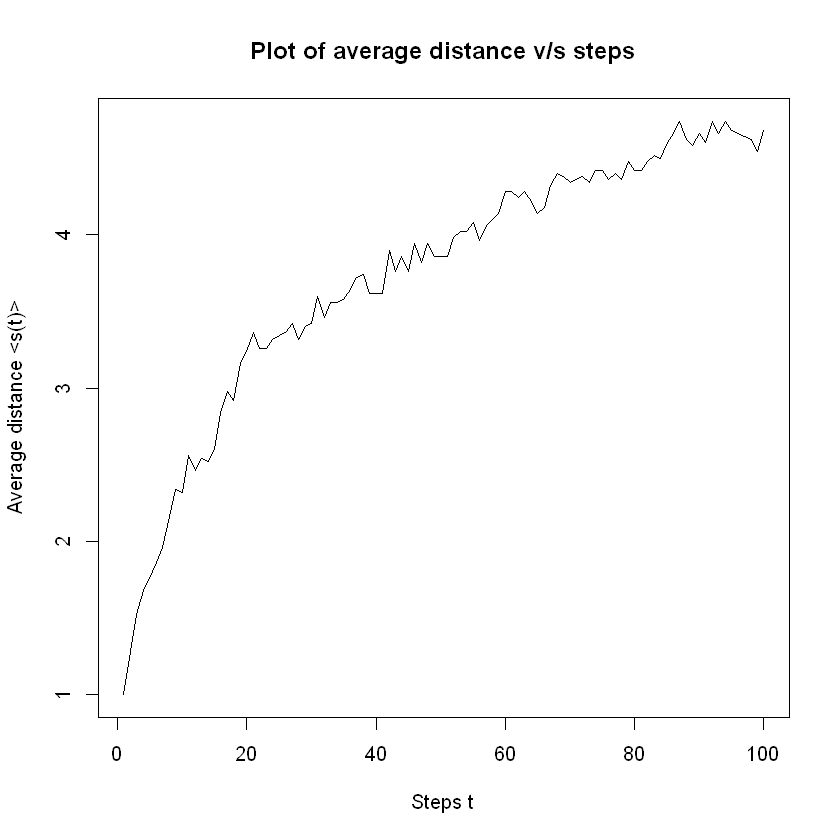

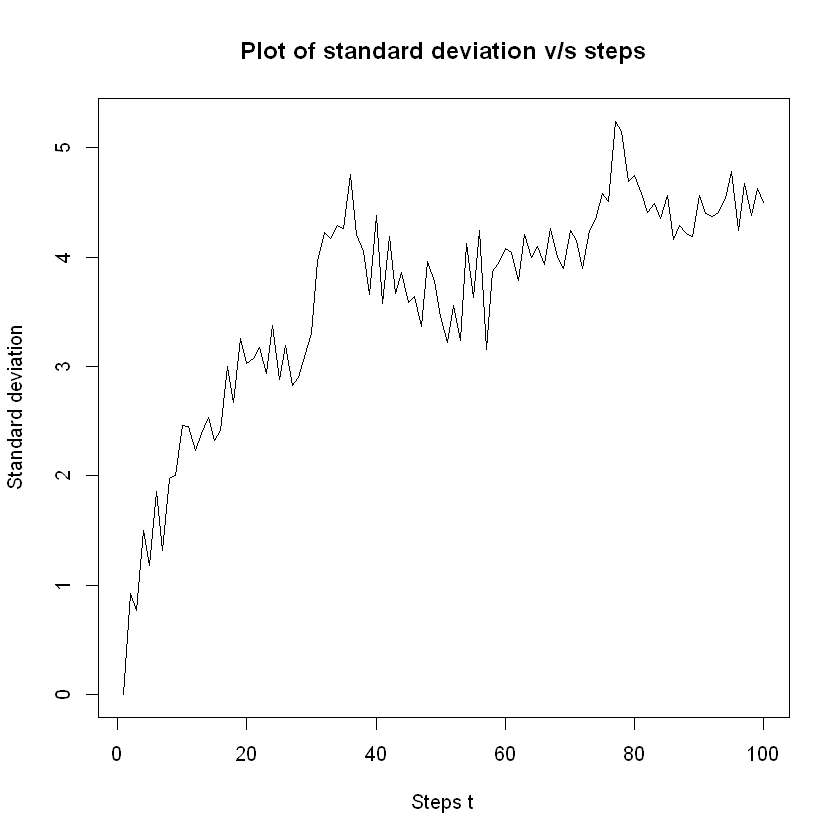

In [24]:
plot(t_arr_3,distance_total_3,type="l",main="Plot of average distance v/s steps", xlab="Steps t", ylab="Average distance <s(t)>")
plot(t_arr_3,sd_3,type="l",main="Plot of standard deviation v/s steps", xlab="Steps t", ylab="Standard deviation")

## Part 2.2 - c

In [25]:
degree_list_3 <- c()

for (i in seq(1,100,1)) {
    v_start = sample(vcount(g3), 1)
    degree_list_3[i] = random_walk_deg(g3, t, v_start)  
}

dg_3 <- table(degree_list_3)/100

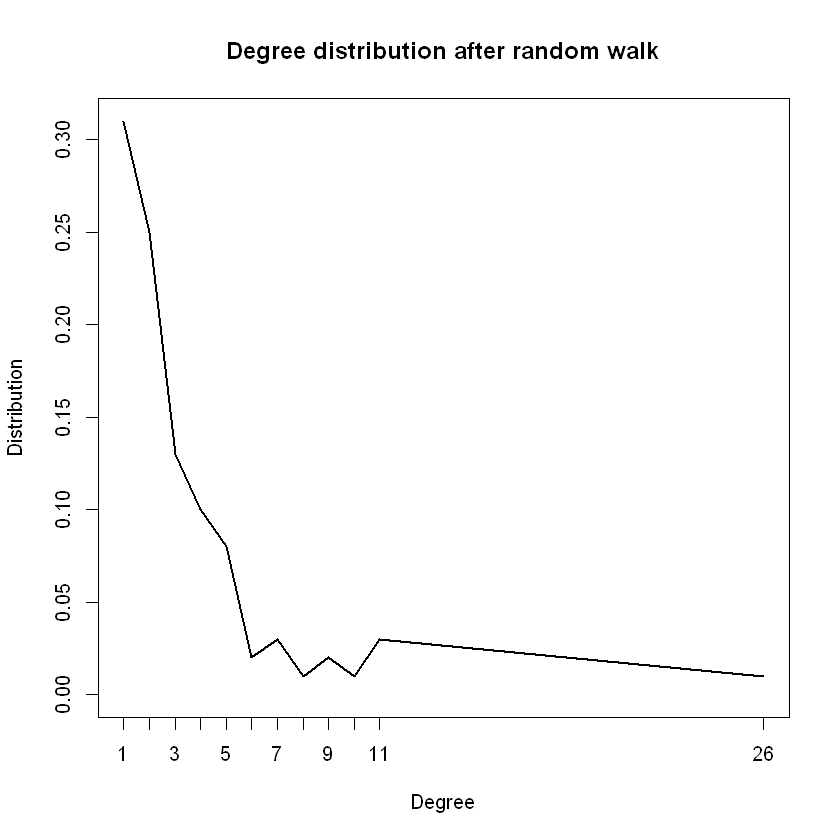

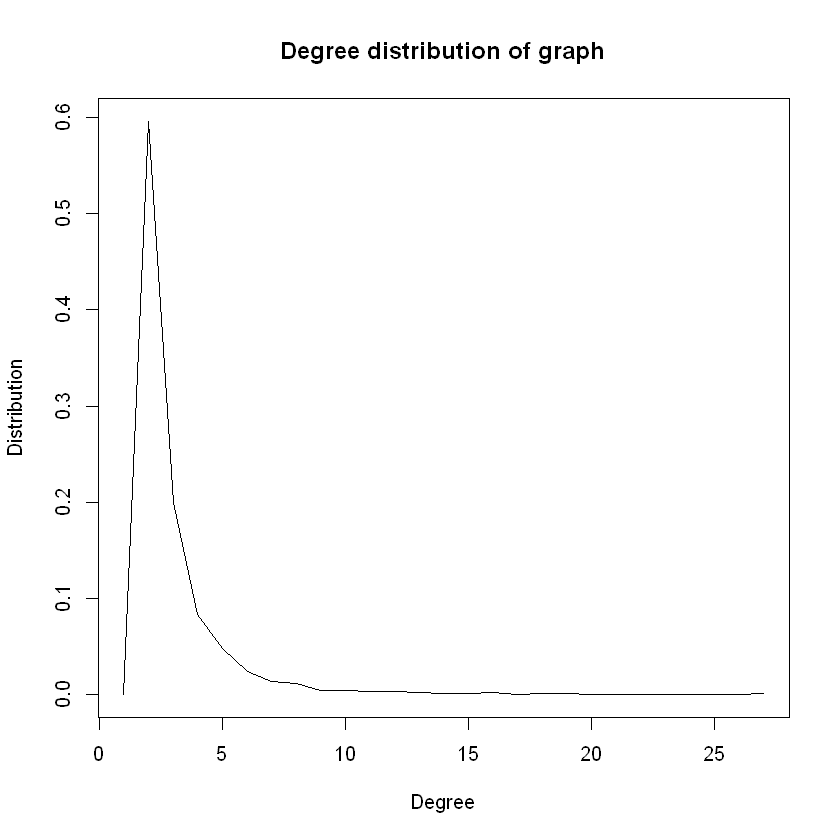

In [26]:
plot(dg_3,type="l",main="Degree distribution after random walk", xlab="Degree", ylab="Distribution")
plot(degree.distribution(g3),type="l",main="Degree distribution of graph", xlab="Degree", ylab="Distribution")

## Part 2.2 - d

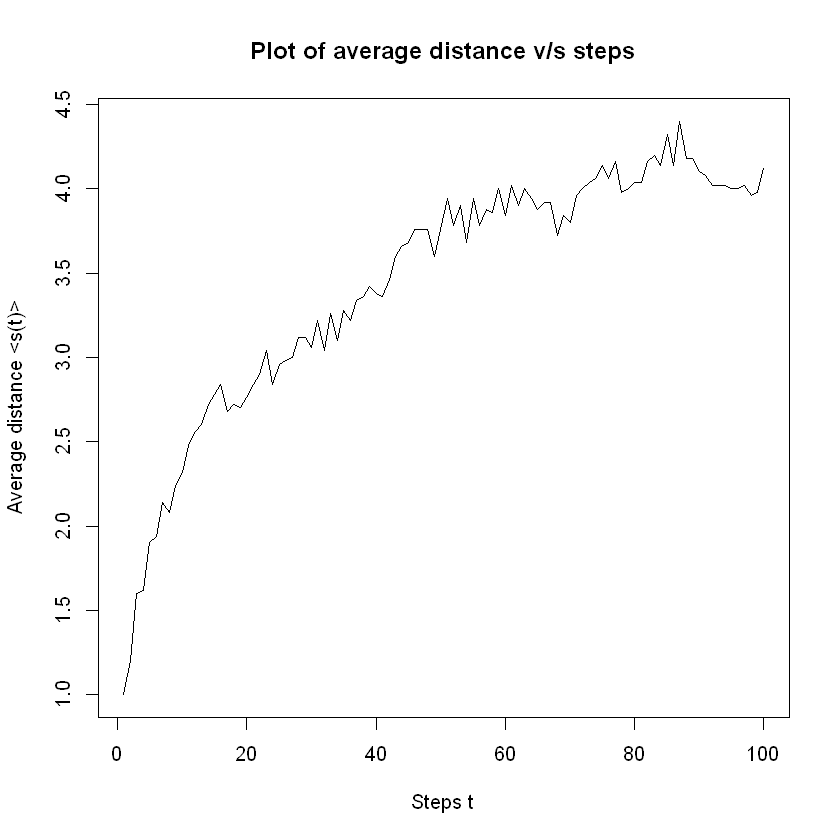

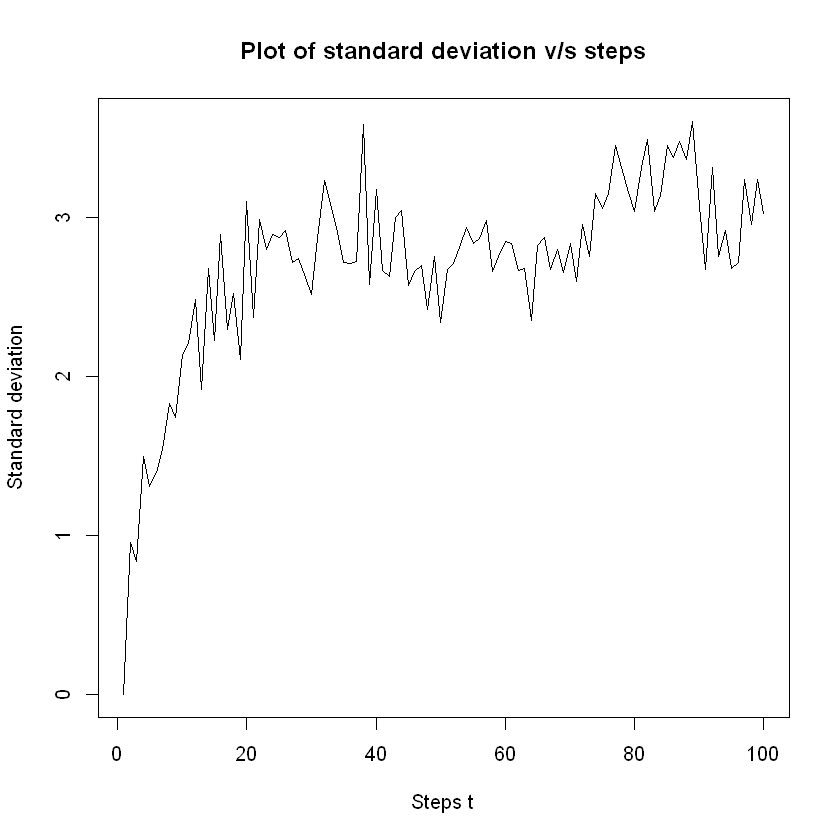

In [27]:
g4 <- barabasi.game(100, m=1, directed=FALSE)
t<-100

distance_total_4<-seq(0,0,length.out=t)
total_list_4 <- list()
t_arr_4<-seq(1,t,1)

for (i in seq(1,100,1)) {
    v_start = sample(vcount(g4), 1)
    distance = random_walk(g4, t, v_start)
    total_list_4[[i]] <- distance 
    distance_total_4<-distance_total_4+distance   
}

distance_total_4<-distance_total_4/100

sd_4 <- seq(0,0,length.out=t)
for(i in seq(1,100,1)) {
    sd_4<-sd_4+`^`(total_list_4[[i]]-distance_total_4,2)
}

sd_4<-sd_4/100

plot(t_arr_4,distance_total_4,type="l",main="Plot of average distance v/s steps", xlab="Steps t", ylab="Average distance <s(t)>")
plot(t_arr_4,sd_4,type="l",main="Plot of standard deviation v/s steps", xlab="Steps t", ylab="Standard deviation")

## Part 2.3 

In [28]:
g <- barabasi.game(1000, m=4, directed=TRUE)

In [29]:
create_transition_matrix = function (g){
    
    # WARNING: make sure your graph is connected (you might input GCC of your graph)
    
    vs = V(g)
    n = vcount(g)
    adj = as_adjacency_matrix(g)
    adj[diag(rowSums(adj) == 0)] = 1  # handle if the user is using the function for networks with isolated nodes by creating self-edges
    z = matrix(rowSums(adj, , 1))
    
    transition_matrix = adj / repmat(z, 1, n)  # normalize to get probabilities
    
    return(transition_matrix)
}

#Random walk: counting vists of last node only
random_walk_prob = function (g, num_steps, start_node, alpha, transportation, transition_matrix = NULL){
    if(is.null(transition_matrix))
        transition_matrix = create_transition_matrix(g)
    
    count = seq(0,0,length.out=1000)
    v = start_node
    for(i in 1:num_steps){
        PMF = transition_matrix[v, ]
        PMF = (1-alpha)*PMF + alpha*transportation
        v = sample(1:vcount(g), 1, prob = PMF)
    }
    count[v]<-count[v]+1
    return(count)
}

In [30]:
#Second approach of random walk: counting visits to each node (and not only last node)
random_walk_1 = function (g, num_steps, start_node, alpha, transportation, transition_matrix = NULL){
    if(is.null(transition_matrix))
        transition_matrix = create_transition_matrix(g)
    
    count = seq(0,0,length.out=1000)
    v = start_node
    for(i in 1:num_steps){
        PMF = transition_matrix[v, ]
        PMF = (1-alpha)*PMF + alpha*transportation
        v = sample(1:vcount(g), 1, prob = PMF)
        count[v]<-count[v]+1
    }
    count<-count/num_steps
    return(count)
}

## Part 2.3 - a

In [31]:
count_total<-seq(0,0,length.out=1000)
prob <- c()
for (i in seq(1,100,1)) {
    v_start = sample(vcount(g), 1)
    cnt = random_walk_prob(g, 100, v_start, 0, 0.001)
    count_total<- count_total+cnt
}
prob<-count_total/100
prob

[1] 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [38] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [75] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [112] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [149] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [186] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [223] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [260] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [297] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [334] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [371] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [408] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [445] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [482] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [519] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [556] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [593] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [630] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [667] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [704] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [741] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [778] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [815] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [852] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [889] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [926] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [963] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1000] 0

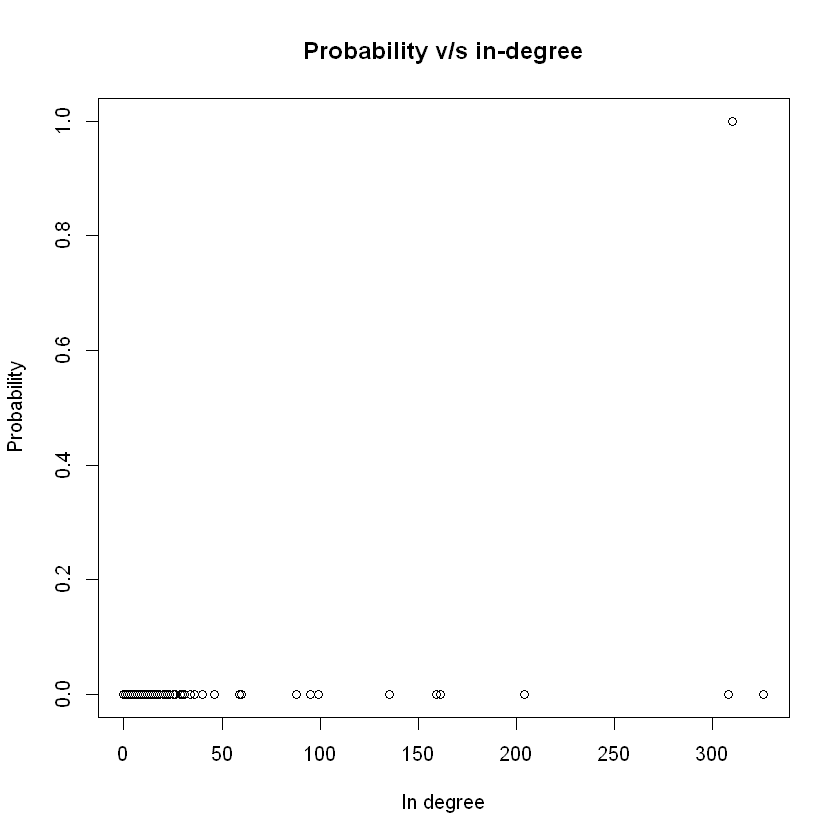

In [32]:
plot(degree(g,mode='in'), prob, main="Probability v/s in-degree", xlab="In degree", ylab="Probability")

In [33]:
#Perform random walk for page rank
#count visits of all nodes
count_total_1<-seq(0,0,length.out=1000)
prob_1 <- c()
for (i in seq(1,100,1)) {
    v_start = sample(vcount(g), 1)
    cnt = random_walk_1(g, 100, v_start, 0, 0.001)
    count_total_1<- count_total_1+cnt
}
prob_1<-count_total_1/100
prob_1

[1] 0.9746 0.0053 0.0022 0.0026 0.0005 0.0005 0.0011 0.0006 0.0011 0.0001
  [11] 0.0009 0.0008 0.0001 0.0000 0.0000 0.0001 0.0001 0.0001 0.0000 0.0003
  [21] 0.0001 0.0000 0.0000 0.0006 0.0001 0.0002 0.0003 0.0000 0.0000 0.0001
  [31] 0.0001 0.0000 0.0002 0.0000 0.0002 0.0003 0.0000 0.0001 0.0000 0.0000
  [41] 0.0000 0.0001 0.0001 0.0001 0.0000 0.0001 0.0000 0.0000 0.0001 0.0000
  [51] 0.0000 0.0002 0.0000 0.0000 0.0000 0.0000 0.0001 0.0001 0.0001 0.0000
  [61] 0.0001 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0001 0.0000
  [71] 0.0002 0.0003 0.0000 0.0000 0.0000 0.0000 0.0000 0.0002 0.0000 0.0000
  [81] 0.0000 0.0000 0.0000 0.0002 0.0000 0.0000 0.0000 0.0001 0.0002 0.0000
  [91] 0.0000 0.0000 0.0000 0.0000 0.0002 0.0000 0.0000 0.0002 0.0001 0.0000
 [101] 0.0000 0.0000 0.0000 0.0000 0.0002 0.0000 0.0001 0.0000 0.0001 0.0000
 [111] 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000
 [121] 0.0000 0.0001 0.0000 0.0000 0.0000 0.0000 0.0001 0.0000 0.0000 0.0000
 [131] 0.0000 0.0000 0.0000 0.0000 0.0001 0.0000 0.0000 0.0000 0.0000 0.0000
 [141] 0.0000 0.0000 0.0000 0.0001 0.0000 0.0000 0.0000 0.0001 0.0000 0.0001
 [151] 0.0000 0.0000 0.0000 0.0000 0.0001 0.0000 0.0000 0.0000 0.0000 0.0000
 [161] 0.0000 0.0000 0.0000 0.0000 0.0001 0.0000 0.0000 0.0001 0.0000 0.0000
 [171] 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0001 0.0000 0.0000
 [181] 0.0000 0.0000 0.0000 0.0000 0.0000 0.0001 0.0000 0.0001 0.0000 0.0000
 [191] 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000
 [201] 0.0000 0.0000 0.0000 0.0001 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000
 [211] 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000
 [221] 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000
 [231] 0.0000 0.0001 0.0000 0.0000 0.0000 0.0000 0.0001 0.0000 0.0001 0.0000
 [241] 0.0000 0.0000 0.0001 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000
 [251] 0.0001 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000
 [261] 0.0001 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0001 0.0000
 [271] 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000
 [281] 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0001 0.0000 0.0000
 [291] 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000
 [301] 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000
 [311] 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000
 [321] 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0001
 [331] 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000
 [341] 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0001 0.0000 0.0000 0.0000
 [351] 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000
 [361] 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000
 [371] 0.0000 0.0000 0.0000 0.0000 0.0001 0.0000 0.0000 0.0000 0.0000 0.0000
 [381] 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000
 [391] 0.0000 0.0000 0.0000 0.0000 0.0000 0.0001 0.0000 0.0000 0.0000 0.0000
 [401] 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000
 [411] 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0002 0.0000 0.0000
 [421] 0.0000 0.0001 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000
 [431] 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000
 [441] 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000
 [451] 0.0001 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000
 [461] 0.0000 0.0001 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000
 [471] 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000
 [481] 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0001
 [491] 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000
 [501] 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000
 [511] 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000

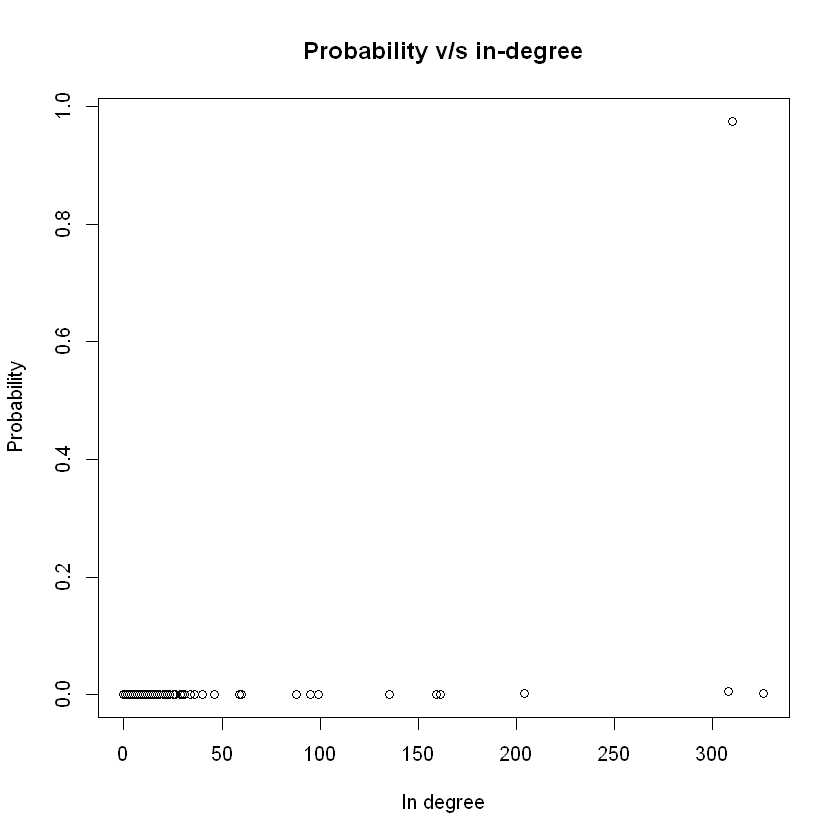

In [35]:
plot(degree(g,mode='in'), prob_1, main="Probability v/s in-degree", xlab="In degree", ylab="Probability")

## Part 2.3 - b

In [36]:
#Perform random walk for page rank with alpha=0.15
count_total_2<-seq(0,0,length.out=1000)
prob_2 <- c()
for (i in seq(1,100,1)) {
    v_start = sample(vcount(g), 1)
    cnt = random_walk_prob(g, 100, v_start, 0.15, 0.001)
    count_total_2<- count_total_2+cnt
}
prob_2<-count_total_2/100
prob_2

[1] 0.58 0.04 0.04 0.06 0.02 0.00 0.00 0.04 0.00 0.00 0.00 0.00 0.00 0.00
  [15] 0.00 0.00 0.00 0.00 0.00 0.00 0.01 0.00 0.00 0.00 0.00 0.00 0.00 0.00
  [29] 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.01 0.00 0.00 0.00 0.00 0.00 0.00
  [43] 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
  [57] 0.01 0.00 0.00 0.00 0.00 0.00 0.01 0.00 0.00 0.00 0.00 0.00 0.00 0.00
  [71] 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
  [85] 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
  [99] 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
 [113] 0.00 0.01 0.00 0.00 0.00 0.00 0.00 0.01 0.00 0.00 0.00 0.00 0.00 0.00
 [127] 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
 [141] 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.01 0.01 0.00 0.00 0.00
 [155] 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
 [169] 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
 [183] 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
 [197] 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
 [211] 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
 [225] 0.00 0.00 0.00 0.00 0.00 0.01 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
 [239] 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
 [253] 0.00 0.00 0.00 0.00 0.00 0.00 0.01 0.00 0.00 0.00 0.00 0.00 0.00 0.00
 [267] 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
 [281] 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
 [295] 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
 [309] 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
 [323] 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
 [337] 0.00 0.01 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
 [351] 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.01 0.00 0.00 0.00 0.00 0.00 0.00
 [365] 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
 [379] 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
 [393] 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.01 0.00 0.00 0.00 0.00
 [407] 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
 [421] 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
 [435] 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
 [449] 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
 [463] 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
 [477] 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
 [491] 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
 [505] 0.00 0.00 0.00 0.00 0.01 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
 [519] 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
 [533] 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
 [547] 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
 [561] 0.00 0.01 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
 [575] 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
 [589] 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
 [603] 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.01 0.00
 [617] 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.01 0.00 0.00 0.00 0.00
 [631] 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
 [645] 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
 [659] 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
 [673] 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
 [687] 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
 [701] 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
 [715] 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00

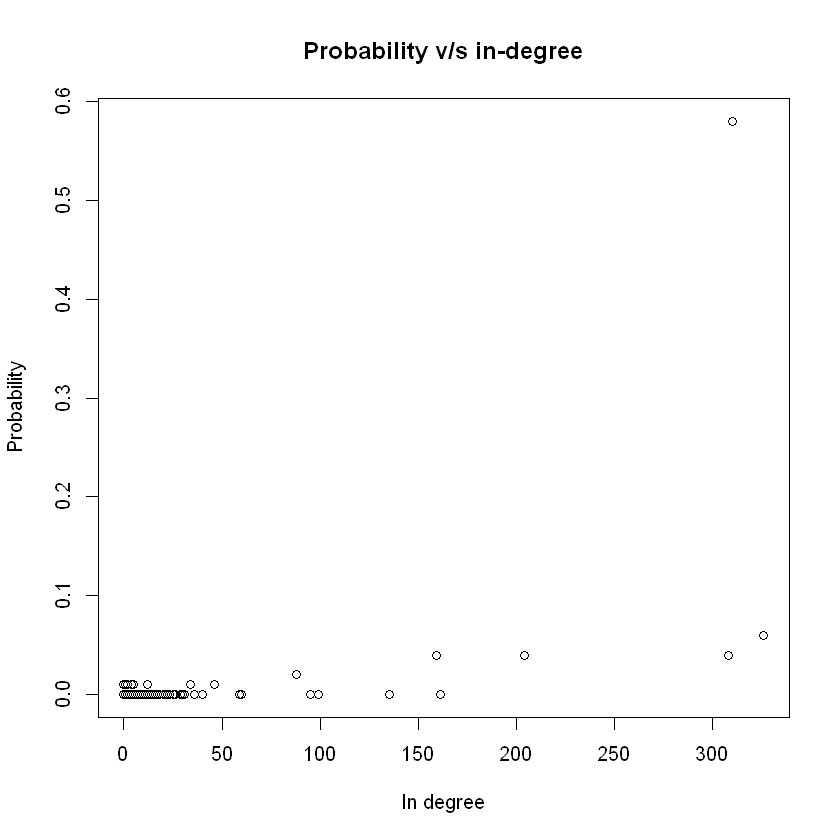

In [37]:
plot(degree(g,mode='in'), prob_2, main="Probability v/s in-degree", xlab="In degree", ylab="Probability")

## Part 2.4 - a

In [38]:
count_total_3<-seq(0,0,length.out=1000)
prob_3 <- c()
for (i in seq(1,100,1)) {
    v_start = sample(vcount(g), 1)
    cnt = random_walk_prob(g, 100, v_start, 0.15, prob)
    count_total_3<- count_total_3+cnt
}
prob_3<-count_total_3/100
prob_3

[1] 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [38] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [75] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [112] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [149] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [186] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [223] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [260] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [297] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [334] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [371] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [408] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [445] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [482] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [519] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [556] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [593] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [630] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [667] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [704] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [741] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [778] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [815] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [852] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [889] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [926] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [963] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1000] 0

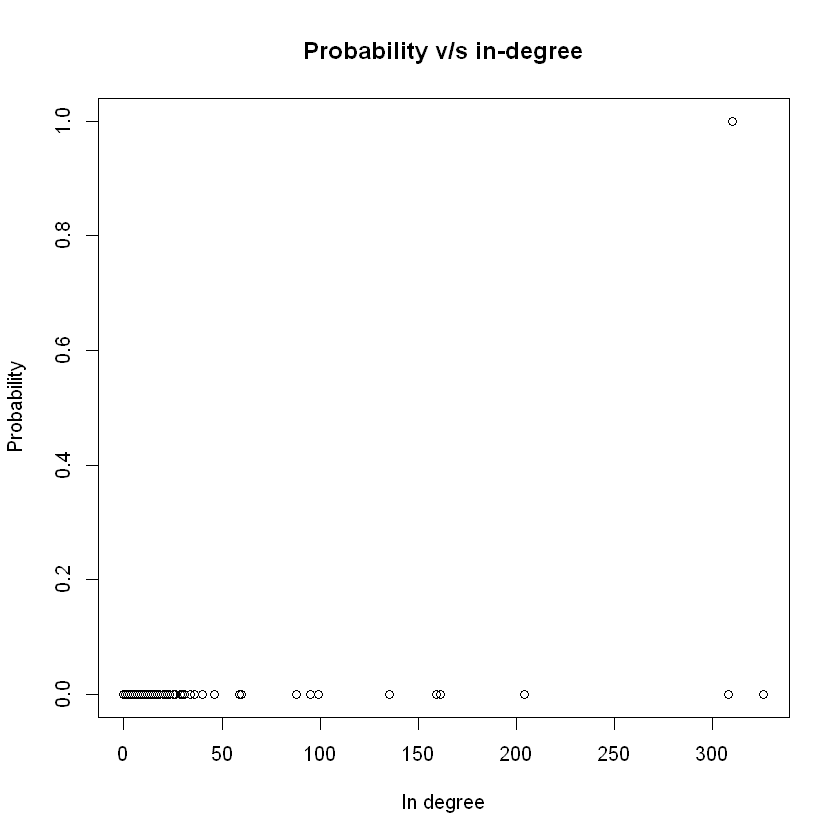

In [39]:
plot(degree(g,mode='in'), prob_3, main="Probability v/s in-degree", xlab="In degree", ylab="Probability")

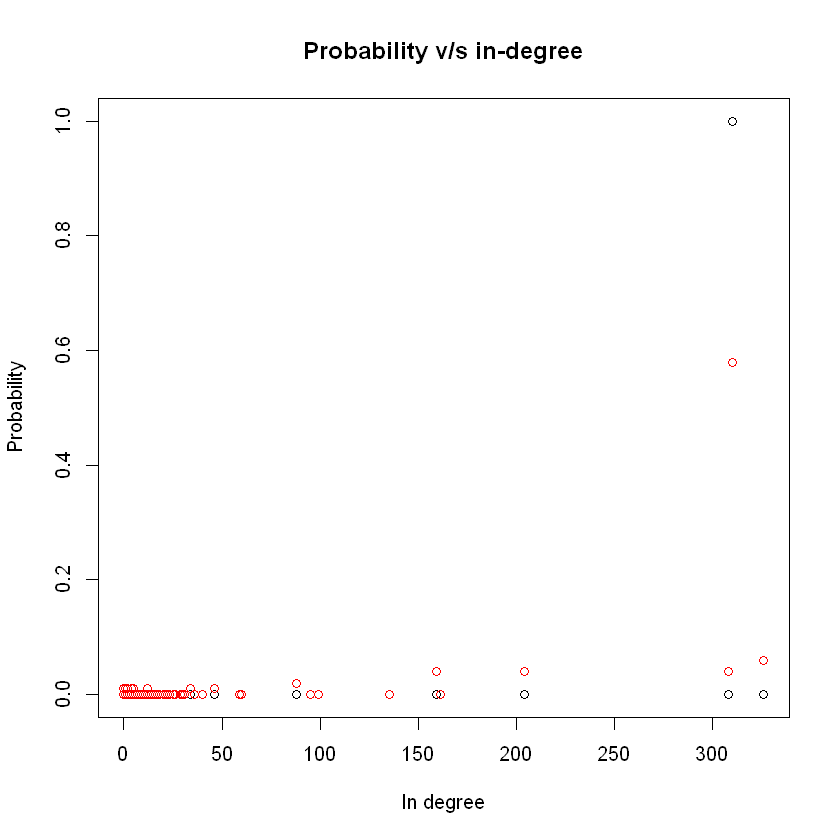

In [40]:
plot(degree(g,mode='in'), prob_3, main="Probability v/s in-degree", xlab="In degree", ylab="Probability")
points(degree(g,mode='in'), prob_2, col="red")

In [41]:
sampled_vertices = sample(2:vcount(g), 2)
prob_modified<-seq(0,0,length.out=1000)
prob_modified[sampled_vertices[1]]=0.5
prob_modified[sampled_vertices[2]]=0.5

In [42]:
prob_modified<-seq(0,0,length.out=1000)
prob_modified[sampled_vertices[1]]=0.5
prob_modified[sampled_vertices[2]]=0.5

In [43]:
shortest.paths(g,545,4)
shortest.paths(g,398,4)

2


1


## Part 2.4 - b

In [44]:
count_total_4<-seq(0,0,length.out=1000)
prob_4 <- c()
for (i in seq(1,100,1)) {
    v_start = sample(vcount(g), 1)
    cnt = random_walk_prob(g, 100, v_start, 0.15, prob_modified)
    count_total_4<- count_total_4+cnt
}
prob_4<-count_total_4/100
prob_4

[1] 0.51 0.08 0.03 0.08 0.03 0.00 0.02 0.00 0.00 0.00 0.00 0.00 0.00 0.00
  [15] 0.00 0.00 0.00 0.00 0.02 0.00 0.00 0.00 0.00 0.02 0.00 0.00 0.00 0.00
  [29] 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.02 0.00 0.00 0.00 0.00
  [43] 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
  [57] 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
  [71] 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
  [85] 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
  [99] 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
 [113] 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
 [127] 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
 [141] 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
 [155] 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
 [169] 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
 [183] 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
 [197] 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
 [211] 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
 [225] 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
 [239] 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
 [253] 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.04
 [267] 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
 [281] 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
 [295] 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
 [309] 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
 [323] 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
 [337] 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
 [351] 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
 [365] 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
 [379] 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
 [393] 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
 [407] 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
 [421] 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
 [435] 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
 [449] 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
 [463] 0.00 0.00 0.00 0.00 0.00 0.00 0.08 0.00 0.00 0.00 0.00 0.00 0.00 0.00
 [477] 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
 [491] 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
 [505] 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
 [519] 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
 [533] 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
 [547] 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
 [561] 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
 [575] 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
 [589] 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
 [603] 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
 [617] 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
 [631] 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
 [645] 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
 [659] 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
 [673] 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
 [687] 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
 [701] 0.00 0.00 0.02 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
 [715] 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00

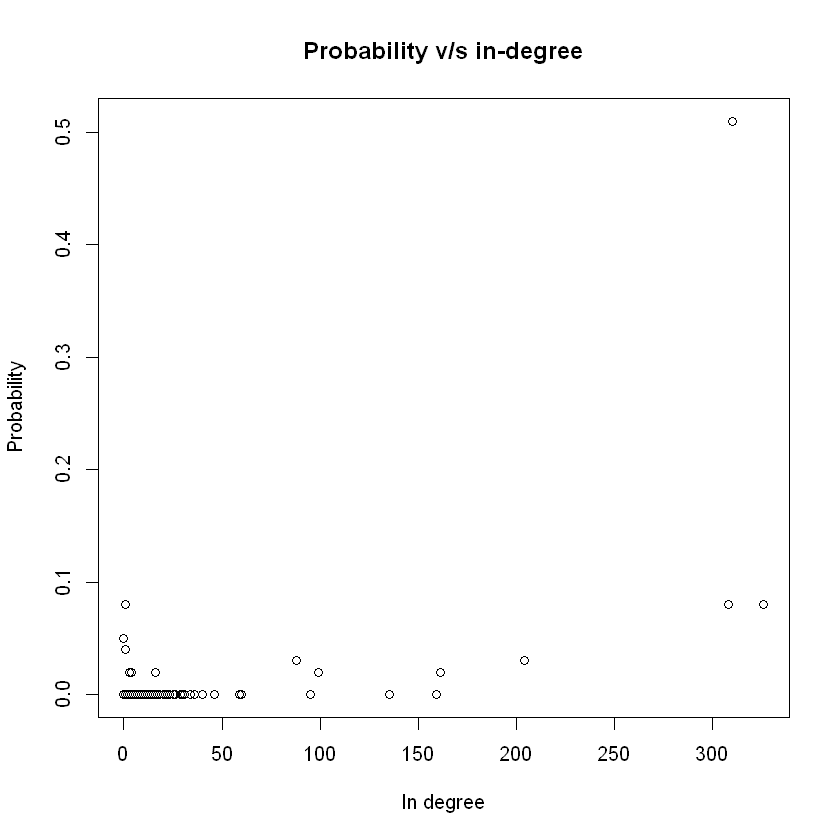

In [45]:
plot(degree(g,mode='in'), prob_4, main="Probability v/s in-degree", xlab="In degree", ylab="Probability")

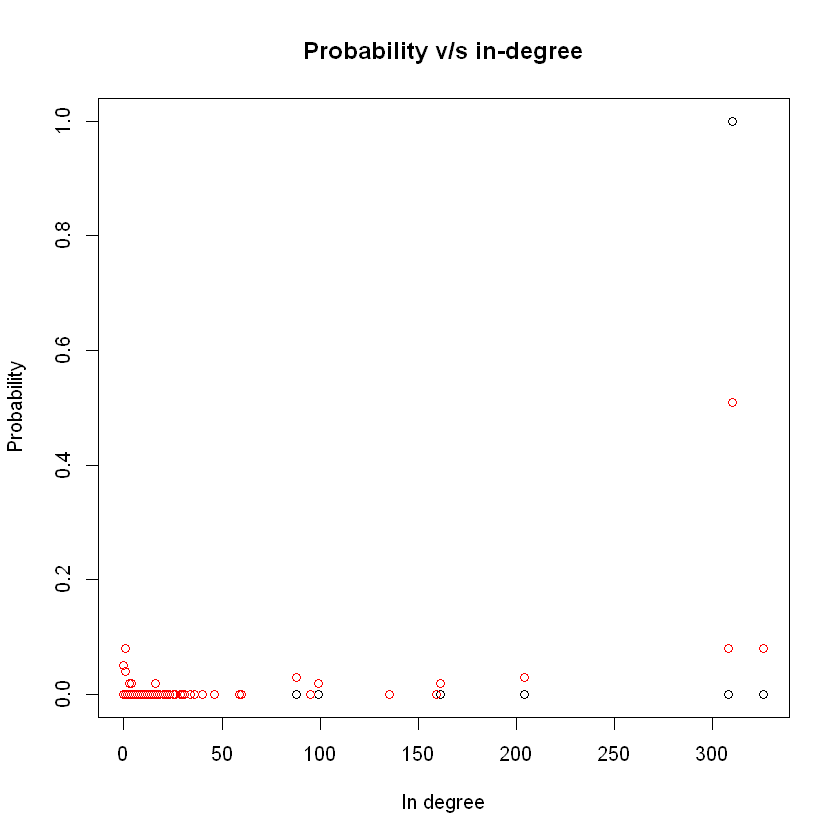

In [46]:
plot(degree(g,mode='in'), prob_3, main="Probability v/s in-degree", xlab="In degree", ylab="Probability")
points(degree(g,mode='in'), prob_4, col="red")

In [47]:
degree(g,mode='in')

[1] 310 308 204 326  88  40 161 159 135  14  60  95  26   0  31   2  15  14
  [19]   4  59  34  22   4  99  23  25  31   2   0  17  29   3  16   0  18  46
  [37]   6  16  36   6   3  10  18  15  22  20   5   2   4  12   0  11   0   0
  [55]   2  12  34   3  18  10  30   0   1   3   8   4   8   8  13  14  14  22
  [73]   1   2  16  11   1  21  10   5   0   7   0  18   0   0   6  12   9   2
  [91]   4   0   1   3  17   0  11  14  13   2   2   1   2   1  14   0   9  11
 [109]  10   0   6   2  14   1   2   6   6   0   2   4   1  13   4   0   4   4
 [127]   4   1   2   2   4   5   0   6  15   1   2   6   2   6   0   8   0   4
 [145]   2   2   0   2   7   4  12   1   4   2  12   0   4   1   5   1   4   3
 [163]   2   2  10   1   0   9   4   1   1   2   7   4   0   9   0   7   2   1
 [181]   2   1   0   0   0  14   4   1   1   3   0   4   6   1   1   1   1   3
 [199]   1   0   2   1   0   8   0   0   1   0   3  12   2   0   1   0   2   0
 [217]   3   8   3   0   1   5   1   5   3   2   0   1   4   5   0   5   5   4
 [235]   0   0  12   1   4   2   4   1   3   4   1   1   1   0   0   0   2   1
 [253]   3   0   0   1   0   0   5   1   9   1   0   0  14   1   0   0   2   5
 [271]   7   0   1   4   0   1   0   7   3   6   3   1   1   3   2   4   1   9
 [289]   0   0   0   0   0   0   0   1   2   3   1   3   5   4   1   2   3   1
 [307]   1   0   2   3   2   1   4   1   2   1   1   0   0   2   3   5   5   3
 [325]   2   0   6   0   2   4   0   6   1   1   0   0   2   0   6   2   3   0
 [343]   0   4   0   5   6   1   0   3   0   1   0   3   2   0   1   2   5   0
 [361]   1   7   0   1   0   2   0   2   0   0   7   0   3   0   3   1   0   0
 [379]   0   0   0   2   0   1   0   0   3   1   1   1   1   1   0   0   0   1
 [397]   5   2   1   0   0   1   1   3   7   0   1   0   1   0   1   0   0   0
 [415]   0   0   1   3   1   0   3   2   0   0   0   0   3   0   0   0   0   0
 [433]   2   0   2   2   3   0   0   1   0   0   0   2   0   0   0   0   1   1
 [451]   7   0   1   0   0   0   0   0   2   8   3   1   0   0   0   0   0   0
 [469]   1   3   2   2   0   1   0   0   0   2   1   1   0   2   1   3   1   1
 [487]   0   0   1   1   0   1   0   0   0   1   1   6   1   0   0   1   0   0
 [505]   0   0   2   1   0   0   2   0   0   0   1   0   0   0   0   0   0   0
 [523]   0   2   2   1   0   0   0   1   2   1   0   0   1   0   0   0   0   0
 [541]   0   0   0   0   0   5   0   1   0   0   1   0   0   0   0   0   0   0
 [559]   2   0   0   1   2   1   0   0   1   1   0   2   0   3   1   0   0   3
 [577]   1   0   0   0   1   1   0   3   1   0   0   0   0   0   0   0   0   1
 [595]   1   0   0   0   0   0   0   0   0   1   1   2   1   1   4   1   0   0
 [613]   0   0   0   1   1   0   0   0   0   1   0   1   1   0   0   1   1   1
 [631]   0   4   0   0   2   0   0   0   0   0   0   0   0   0   0   2   1   0
 [649]   0   1   0   0   0   0   3   0   0   0   2   0   0   0   0   0   0   0
 [667]   1   0   1   0   0   0   0   0   1   0   2   0   0   0   1   0   0   2
 [685]   0   0   2   0   0   0   0   1   0   0   0   0   0   0   0   1   0   0
 [703]   3   0   0   0   0   1   1   0   0   0   1   0   2   0   0   0   0   0
 [721]   0   0   3   0   1   1   0   1   1   0   0   1   0   0   0   2   0   0
 [739]   0   0   1   1   0   0   0   0   0   0   0   0   0   0   0   0   0   1
 [757]   0   1   0   0   1   0   0   1   1   0   0   1   0   0   1   0   0   0
 [775]   1   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0
 [793]   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0
 [811]   0   0   1   0   0   0   0   0   0   0   1   0   1   0   0   1   0   0
 [829]   0   0   0   0   0   0   0   0   1   0   0   0   0   1   0   0   0   0
 [847]   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0
 [865]   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
 [883]   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0
 [901]   0   2   0   0   0   0   0   0   0   0   0   

In [48]:
sampled_vertices

[1] 944 469

In [49]:
prob_4[944]

[1] 0.05

In [50]:
prob_4[469]

[1] 0.08